<a href="https://colab.research.google.com/github/LeQuXi/AI_lequxi/blob/main/AIGroupWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/diabetes_no_target.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [8]:
df=pd.read_csv('diabetes_no_target.csv')
'''df.head()'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


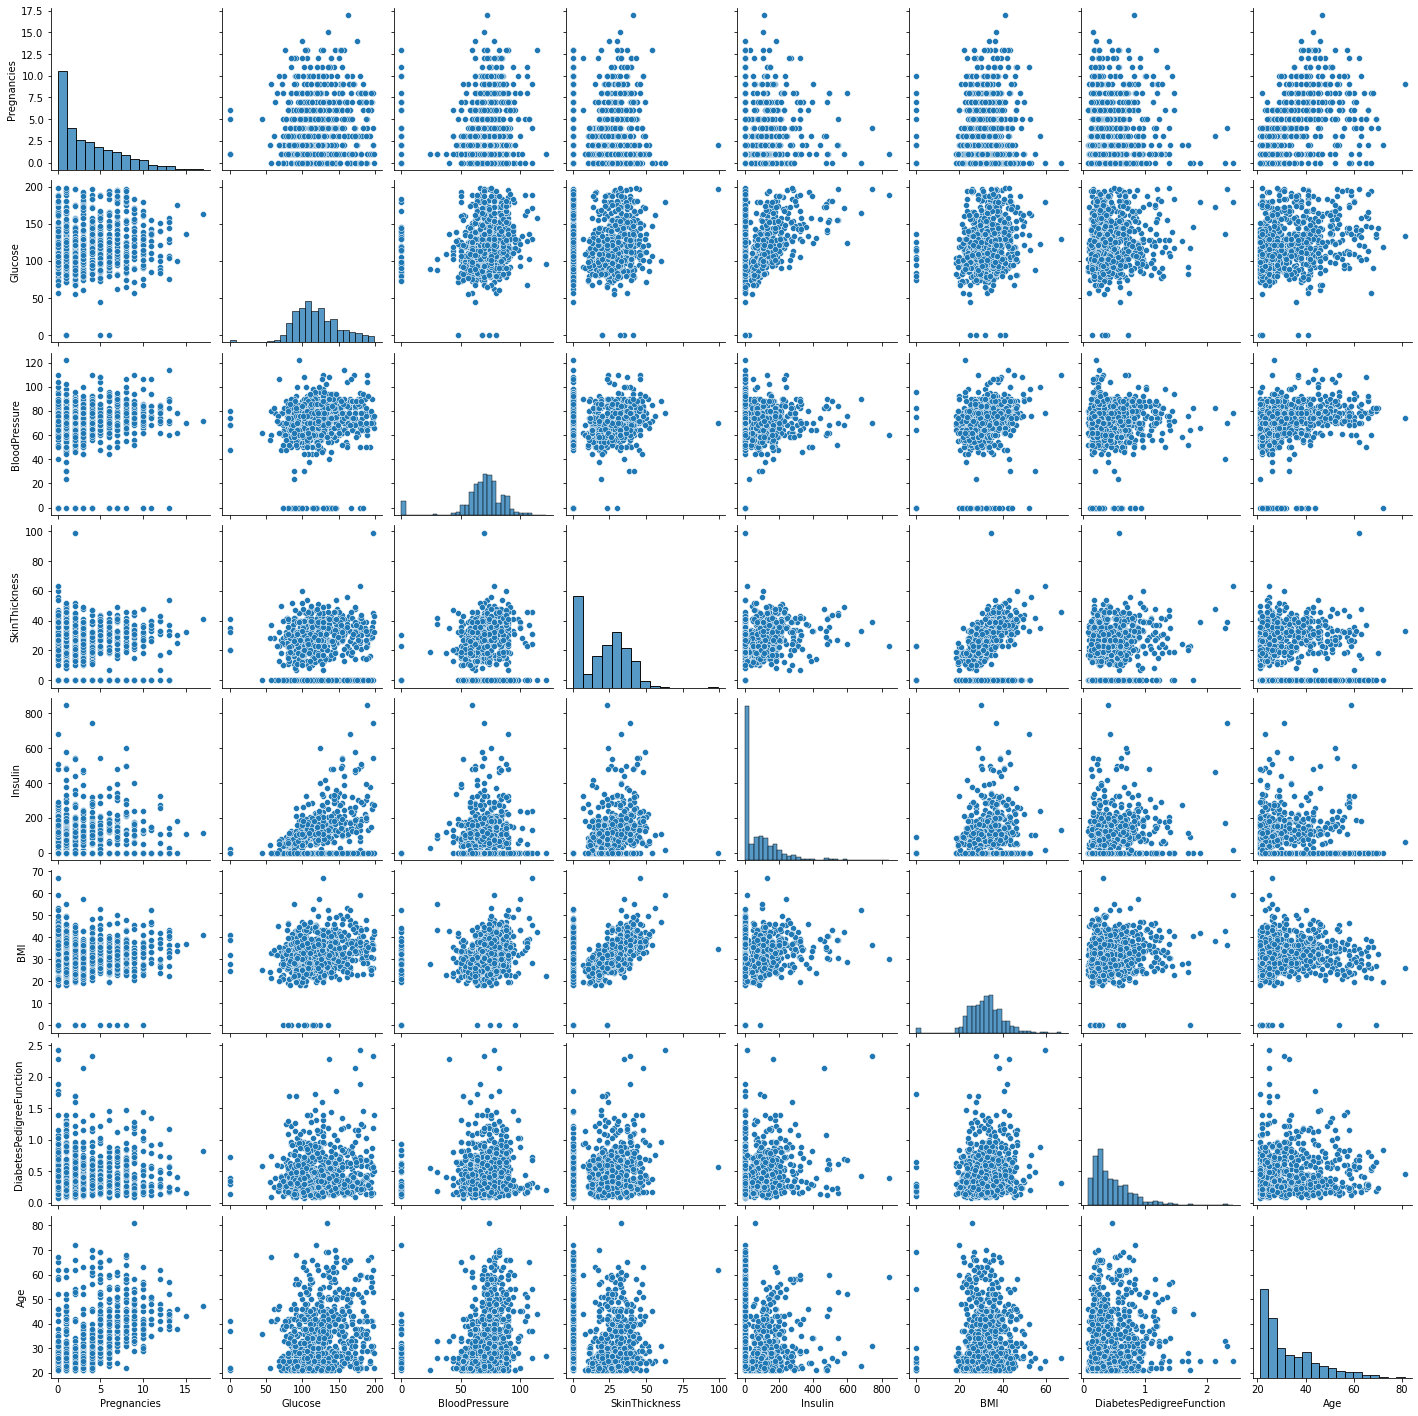

In [10]:
sns.pairplot(df)
# df=df.drop(['Output'],axis=1)

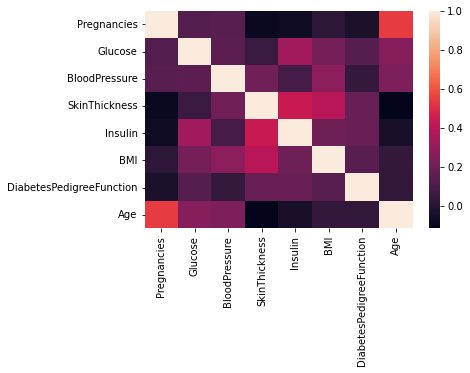

In [11]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

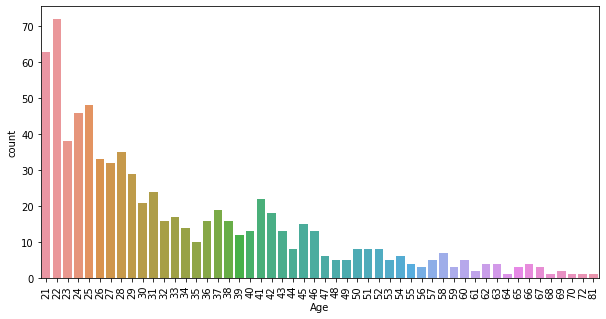

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])
plt.xticks(rotation=90)

In [15]:
x=df.iloc[:,[1,7]].values
x.shape

(768, 2)

In [16]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [17]:
model=db.fit(x)
label=model.labels_
label

array([-1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  9,  1, -1,  2,  0,  0,
        0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  4,  3,  0,  0,
        0,  0,  0,  0,  0,  4,  5,  0,  0, -1, -1,  5,  0,  0,  0,  0,  0,
        0,  0, -1, 12,  0,  6,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  4,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  7,  0,  0,  0,  0, -1,  8,
        0,  0,  0,  0,  0,  7,  0,  0,  5, 12,  0,  0, -1, -1,  0,  0,  0,
        0, 13,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  9, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  8,  0, -1,  0, -1,  0,  0,  0, -1,
        8,  6, 10,  0,  0,  0,  2, 10,  0,  0,  0,  0,  0,  8,  0,  0,  0,
        0, -1,  0,  0, -1, 11, -1,  0, -1,  0,  0,  0, -1,  0,  7, -1, -1,
        0,  0,  0,  0,  0, -1,  0, -1,  3,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  2,  0,  6,  0,  0, -1,  0,  0, 10,  0,  0,  0,  0,  5,
       -1,  0, -1,  0,  0

In [18]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 18


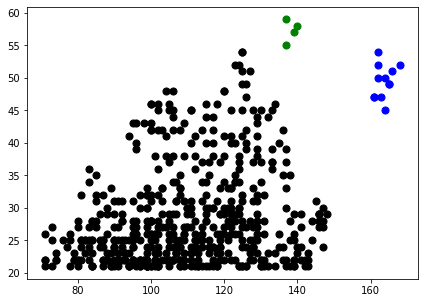

In [33]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'green')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'blue')
plt.show()

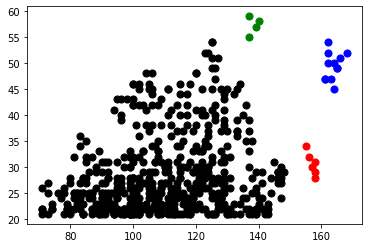

In [32]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'green')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'red')

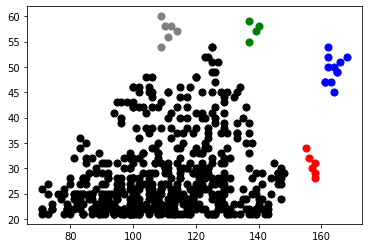

In [31]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'green')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'grey')

No handles with labels found to put in legend.


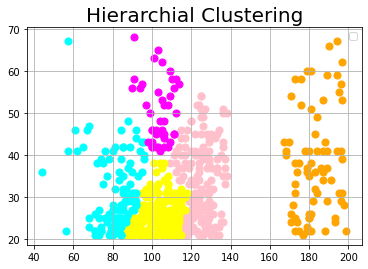

In [34]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


# **first clustering algorithm implementation**
 **DBSCAN**
 The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm.

While the parameter min_samples primarily controls how tolerant the algorithm is towards noise (on noisy and large data sets it may be desirable to increase this parameter), the parameter eps is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value. It controls the local neighborhood of the points. When chosen too small, most data will not be clustered at all (and labeled as -1 for “noise”). When chosen too large, it causes close clusters to be merged into one cluster, and eventually the entire data set to be returned as a single cluster. Some heuristics for choosing this parameter have been discussed in the literature, for example based on a knee in the nearest neighbor distances plot

ref:
https://scikit-learn.org/stable/modules/clustering.html#dbscan


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
df = pd.read_csv("diabetes_no_target.csv")
'''df.head()
df.tail()
df.shape'''
data = df.iloc[:,0:4]
target = df.iloc[:,4]
df[:5]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


In [ ]:
outliers_df=pd.DataFrame(data)
print(Counter(model.labels_))
print(outliers_df[model.labels_==-1])

Counter({-1: 768})
     Pregnancies  Glucose  BloodPressure  SkinThickness
0              6      148             72             35
1              1       85             66             29
2              8      183             64              0
3              1       89             66             23
4              0      137             40             35
..           ...      ...            ...            ...
763           10      101             76             48
764            2      122             70             27
765            5      121             72             23
766            1      126             60              0
767            1       93             70             31

[768 rows x 4 columns]


KeyError: ignored

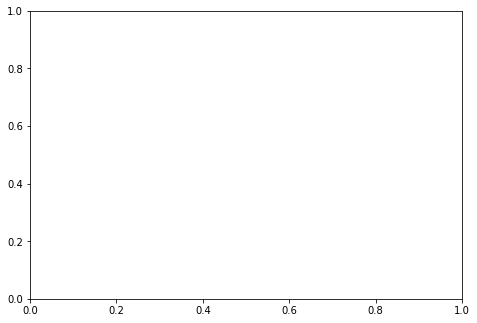

In [ ]:
fig=plt.figure()
ax = fig.add_axes([.1,.1, 1,1])
colors = model.labels_
ax.scatter(data.loc[:,2].values, data.loc[data:,1].values, c=colors, s=120)
ax.set_xlabel("Petal length")
ax.set_ylabel("Sepal width")
plt.title("DBSCAN")

#Say K-means

# New Section

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

In [ ]:
from __future__ import print_function, division
import numpy as np


class KMeans():
    """A simple clustering method that forms k clusters by iteratively reassigning
    samples to the closest centroids and after that moves the centroids to the center
    of the new formed clusters.
    Parameters:
    -----------
    k: int
        The number of clusters the algorithm will form.
    max_iterations: int
        The number of iterations the algorithm will run for if it does
        not converge before that. 
    """
    def __init__(self, k=2, max_iterations=500):
        self.k = k
        self.max_iterations = max_iterations

    def _init_random_centroids(self, X):
        """ Initialize the centroids as k random samples of X"""
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    def _closest_centroid(self, sample, centroids):
        """ Return the index of the closest centroid to the sample """
        closest_i = 0
        closest_dist = float('inf')
        for i, centroid in enumerate(centroids):
            distance = euclidean_distance(sample, centroid)
            if distance < closest_dist:
                closest_i = i
                closest_dist = distance
        return closest_i

    def _create_clusters(self, centroids, X):
        """ Assign the samples to the closest centroids to create clusters """
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    def _calculate_centroids(self, clusters, X):
        """ Calculate new centroids as the means of the samples in each cluster  """
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    def _get_cluster_labels(self, clusters, X):
        """ Classify samples as the index of their clusters """
        # One prediction for each sample
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    def predict(self, X):
        """ Do K-Means clustering and return cluster indices """

        # Initialize centroids as k random samples from X
        centroids = self._init_random_centroids(X)

        # Iterate until convergence or for max iterations
        for _ in range(self.max_iterations):
            # Assign samples to closest centroids (create clusters)
            clusters = self._create_clusters(centroids, X)
            # Save current centroids for convergence check
            prev_centroids = centroids
            # Calculate new centroids from the clusters
            centroids = self._calculate_centroids(clusters, X)
            # If no centroids have changed => convergence
            diff = centroids - prev_centroids
            if not diff.any():
                break

        return self._get_cluster_labels(clusters, X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


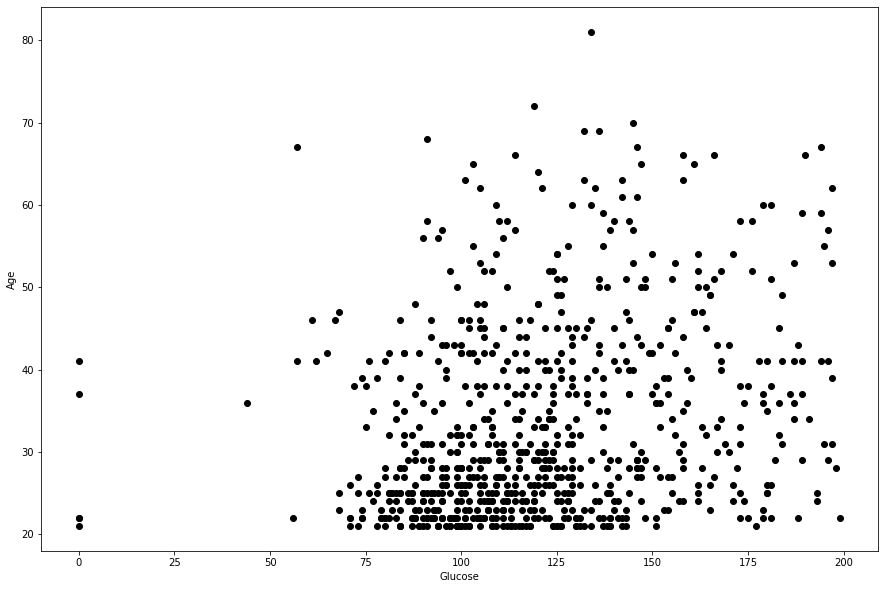

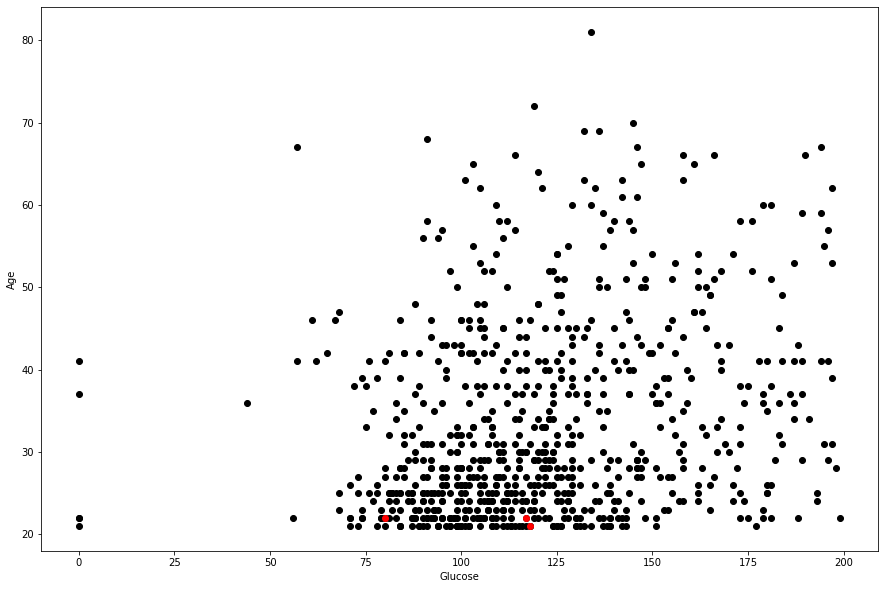

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


9.500875252987587
5.822263230013778
4.502954284197784
3.5295562690005156
1.7787335017678423
1.3691847295924475
0.6193010829556052
0.2516303697790292
0.49482679656881956
0.32723596780776987
0.0


NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv("diabetes_no_target.csv")
df.info()
df.columns
df.head()

X = df[["Age","Glucose"]]

#Visualise data points
plt.figure(figsize=(15, 10))
plt.scatter(X["Glucose"],X["Age"],c='black')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()


# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
plt.figure(figsize=(15, 10))
Centroids = (X.sample(n=K))
plt.scatter(X["Glucose"],X["Age"],c='black')
plt.scatter(Centroids["Glucose"],Centroids["Age"],c='red')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()


# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Glucose"]-row_d["Glucose"])**2
            d2=(row_c["Age"]-row_d["Age"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Age","Glucose"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Age'] - Centroids['Age']).sum() + (Centroids_new['Glucose'] - Centroids['Glucose']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Age","Glucose"]]


color=['blue','green','cyan']
plt.figure(figsize=(15, 10))
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Glucose"],data["Age"],c=color[k])
plt.scatter(Centroids["Glucose"],Centroids["Age"],c='red')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()    




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


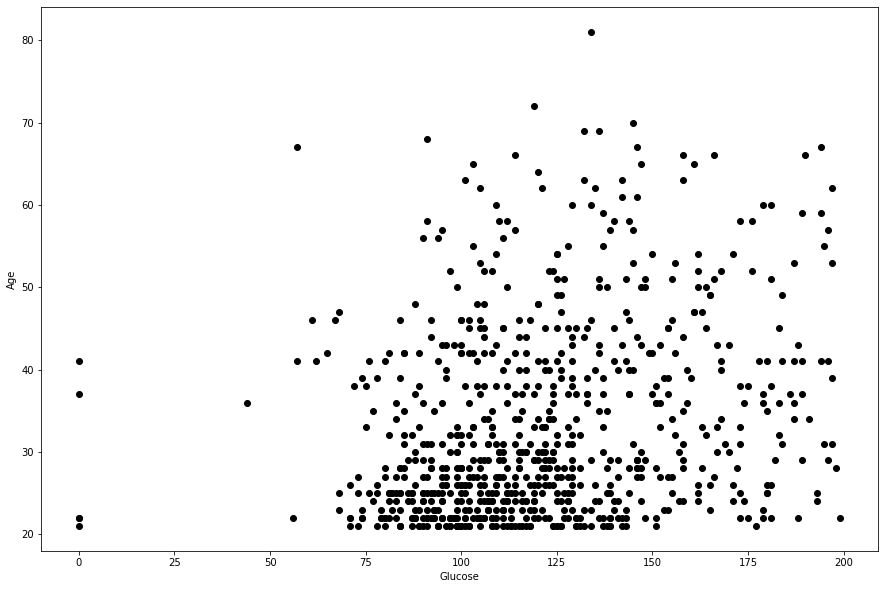

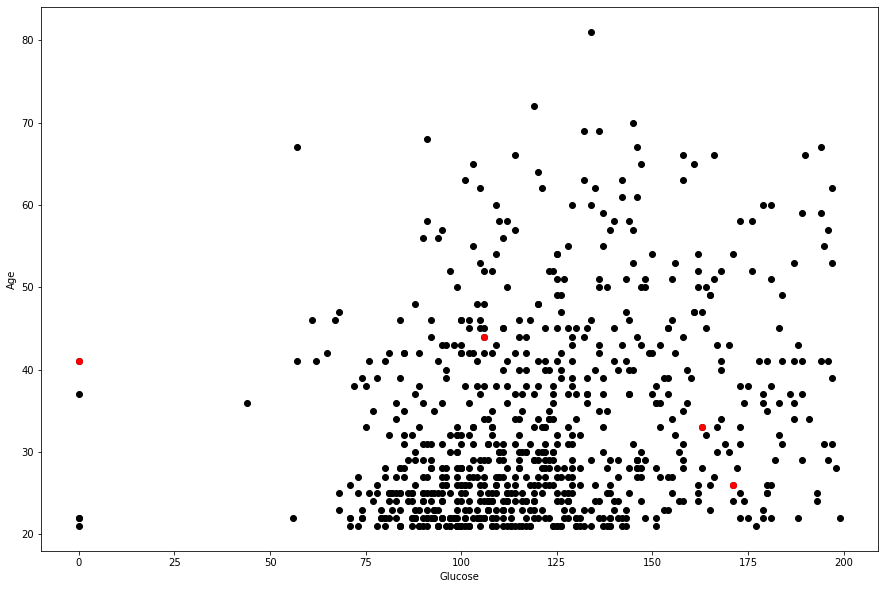

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.491713591444797
6.13805467762405
-0.3111885226437181
-2.0434567783142406
-1.2739083885859408
-0.2912202754217681
-2.259421253702179
-1.3853727488281677
-1.205003230040628
-0.8401986012605533
-0.9973768765251414
-0.37844167475430623
-0.25450867482454953
-0.6312607622065869
-0.12350629530089563
0.0


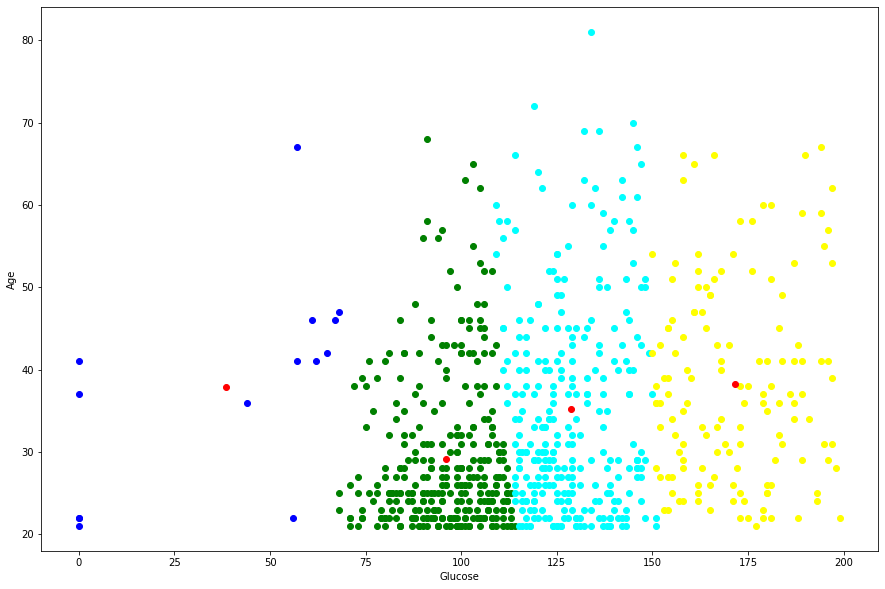

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv("diabetes_no_target.csv")
df.info()
df.columns
df.head()

X = df[["Age","Glucose"]]

#Visualise data points
plt.figure(figsize=(15, 10))
plt.scatter(X["Glucose"],X["Age"],c='black')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()


# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=4

# Select random observation as centroids
plt.figure(figsize=(15, 10))
Centroids = (X.sample(n=K))
plt.scatter(X["Glucose"],X["Age"],c='black')
plt.scatter(Centroids["Glucose"],Centroids["Age"],c='red')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()


# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Glucose"]-row_d["Glucose"])**2
            d2=(row_c["Age"]-row_d["Age"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Age","Glucose"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Age'] - Centroids['Age']).sum() + (Centroids_new['Glucose'] - Centroids['Glucose']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Age","Glucose"]]



color=['blue','green','cyan','yellow']
plt.figure(figsize=(15, 10))
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Glucose"],data["Age"],c=color[k])
plt.scatter(Centroids["Glucose"],Centroids["Age"],c='red')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


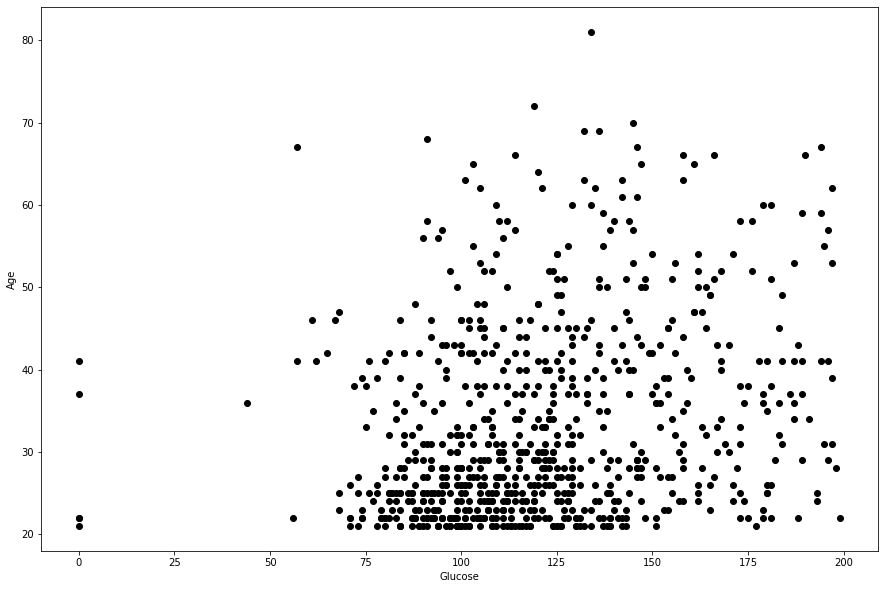

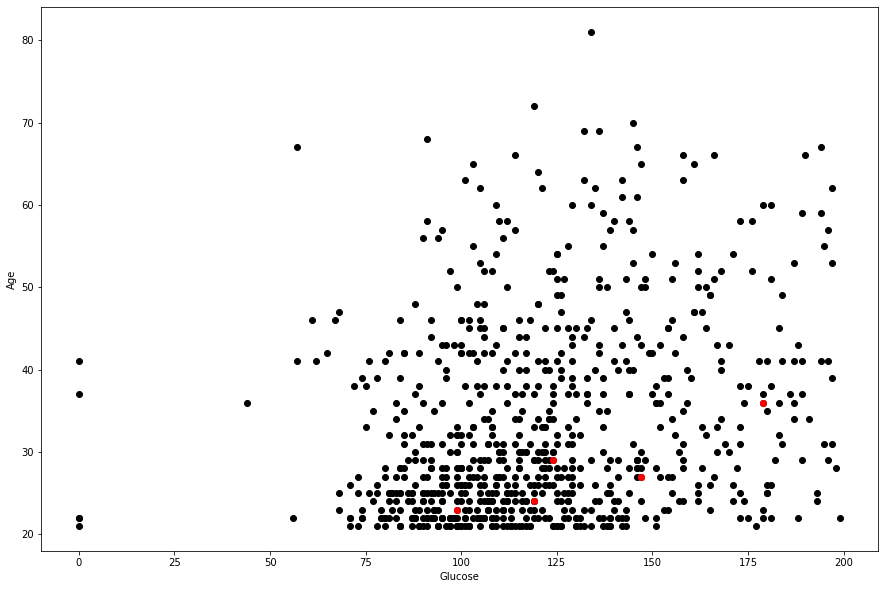

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.5479255572752528
0.8303846677389757
-1.061276950892541
-0.37497277891842273
-0.4625725706327479
-0.30298163947317747
-0.7284405667860128
-0.5980525521711684
-0.1275845327319125
-0.25672877169456854
-1.3335010635650235
-0.4053542440071958
-0.4004167620112895
-0.24522945877290425
-1.2518188290431134
-1.6355058909482345
-1.3945854376382627
-0.9280271601031096
-0.2418052068783645
-0.21995405914690735
0.052592592592592524
0.5177911550364307
-0.2335927070524022
-0.5710253991532426
-0.7045834847560606
-0.1723338252454063
-0.7979831255742837
-0.915465173266707
-0.3461808434136131
-0.009982759691936849
0.0


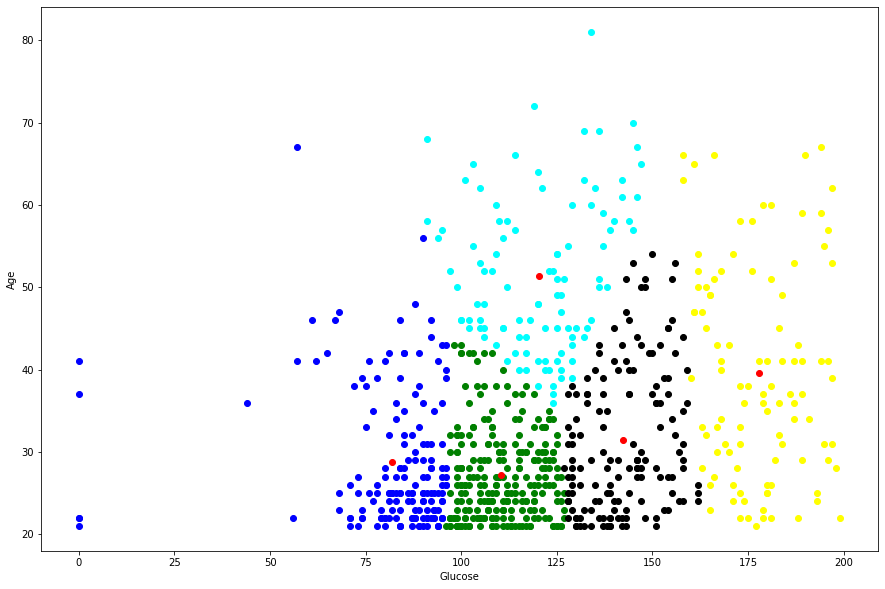

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv("diabetes_no_target.csv")
df.info()
df.columns
df.head()

X = df[["Age","Glucose"]]

#Visualise data points
plt.figure(figsize=(15, 10))
plt.scatter(X["Glucose"],X["Age"],c='black')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()


# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=5

# Select random observation as centroids
plt.figure(figsize=(15, 10))
Centroids = (X.sample(n=K))
plt.scatter(X["Glucose"],X["Age"],c='black')
plt.scatter(Centroids["Glucose"],Centroids["Age"],c='red')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()


# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Glucose"]-row_d["Glucose"])**2
            d2=(row_c["Age"]-row_d["Age"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Age","Glucose"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Age'] - Centroids['Age']).sum() + (Centroids_new['Glucose'] - Centroids['Glucose']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Age","Glucose"]]



color=['blue','green','cyan','yellow','black']
plt.figure(figsize=(15, 10))
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Glucose"],data["Age"],c=color[k])
plt.scatter(Centroids["Glucose"],Centroids["Age"],c='red')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show() 